# DS-210: Programming for Data Science


# Lecture 9: Linear regression and its generalizations


## Linear regression

### Simplest setting

**Input:** set of points $(x_i,y_i)$ in $\mathbb R \times \mathbb R$

* What function $f:\mathbb R \rightarrow \mathbb R$ explains the relationship of $x_i$'s with $y_i$'s?

* What linear function $f(x) = a x + b$ describes it best? 

### Multivariate version
**Input:** set of points $(X_i,y_i)$ in $\mathbb R^d \times \mathbb R$

Find linear function $f(x_1,x_2,\ldots,x_d) = a_1 x_1 + \cdots + a_d x_d + b$ that describes $y_i$'s in terms of $X_i$'s? 


### Why linear regression?
* Have to assume something!
* Models hidden linear relationship + noise

## Typical objective: minimize square error

* Points rarely can be described exactly using a linear relationship 

* How to decide between several non-ideal options?

* Typically want to find $f$ that minimizes total square error:

$$\sum_{i} \left(f(x_i) - y_i\right)^2$$

## Examples for $d = 1$

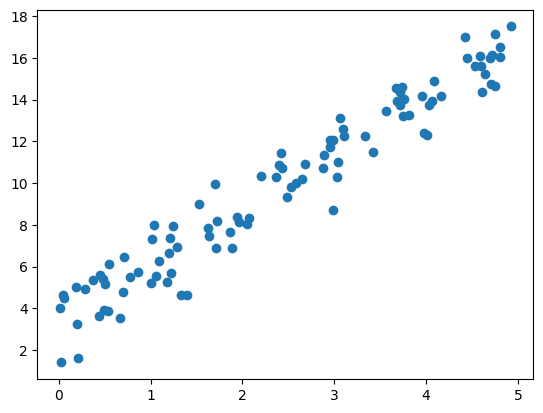

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

# generate data
SAMPLES = 100
A,B = 0.0,5.0
x = np.random.uniform(low=A,high=B,size=SAMPLES)
y = x * math.e + math.pi \
    + np.random.normal(size=SAMPLES)
plt.plot(x,y,"o");

### Using `numpy.polyfit`

Finds the best **polynomial** of degree bounded by the third parameter

In [2]:
c = np.polyfit(x,y,1)
# Return slope and intercept
c

array([2.68815105, 3.36056116])

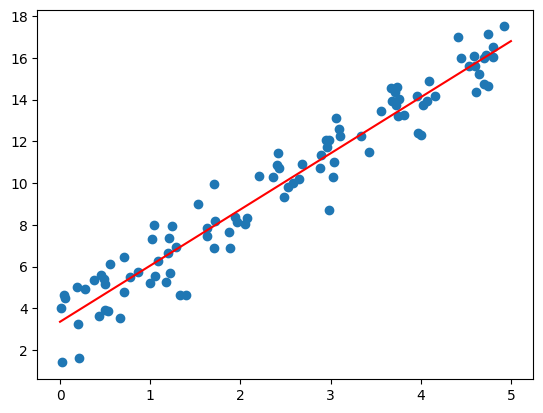

In [3]:
reg_x = np.linspace(A,B,num=100)
reg_y = reg_x * c[0] + c[1]
plt.plot(x,y,"o",reg_x,reg_y,"r");

## `numpy.polyfit`: fitting higher degree polynomials

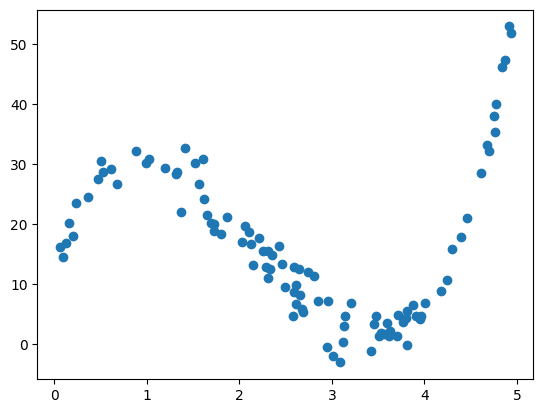

In [8]:
y2 = x**3 * 4 - x**2 * 26 + x * 38 + \
    15 + 3.0 * np.random.normal(size=SAMPLES)
plt.plot(x,y2,"o");

### How is this different from Interpolation (Lecture 6)?
* Not guaranteed to go through the points.  Best line that minimizes error.  Interpolation will cover all points exactly!

## Examples for $d=1$: using `scipy.stats.linregress`

In [6]:
from scipy.stats import linregress
SAMPLES = 100
A,B = 0.0,5.0
x = np.random.uniform(low=A,high=B,size=SAMPLES)
y = x * math.e + math.pi \
    + np.random.normal(size=SAMPLES)
result = linregress(x,y)
result

LinregressResult(slope=2.745666482961407, intercept=3.0311313859980586, rvalue=0.9596335981814865, pvalue=8.595918900094628e-56, stderr=0.08128805972452811, intercept_stderr=0.2408260701972834)

 * `slope`${}= a$
 * `intercept`${}= b$
in

$$f(x) = ax + b$$  
 * rvalue = Pearson coefficient for x, y $(cov(x,y)/\sigma_x*\sigma_y)$
 * pvalue = (Don't worry about it) 😀
 * stderr = standard error around the slope
 * intercept_stderr = standard error around the intercept
 

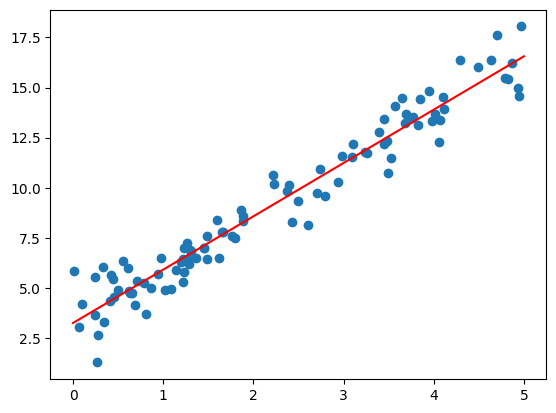

In [9]:
reg_x = np.array([A,B])
reg_y = reg_x * result.slope + result.intercept
plt.plot(x,y,"o",reg_x,reg_y,"-r");

## Coefficient of determination (or $R^2$)

* How good is my function $f$?

* **Input:** points $\{(x_1,y_1),(x_2,y_2),\ldots,(x_n,y_n)\}$

* **Idea:** Compare variance of $y_i$'s to the deviation of $y_i$'s from $f(x_i)$'s

* **Formally:** 

$$1 - \frac{\sum_i \left(y_i - f(x_i)\right)^2}{\sum_i \left(y_i - \bar y\right)^2}
= 1 - \frac{\frac{1}{n}\sum_i \left(y_i - f(x_i)\right)^2}{\mbox{Var}(y_i)}
$$
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;where $\bar y = \frac{1}{n}\sum_i y_i$

* **Range:** $(-\infty,1]$ &nbsp;&nbsp;&nbsp;&nbsp;(should be in $[0,1]$ for linear regression)

<div align="center">
    <b>Intuition:</b> What fraction of $y_i$'s variance is explained by $f$?
</div>

## Compute for our data!
$$1 - \frac{\sum_i \left(y_i - f(x_i)\right)^2}{\sum_i \left(y_i - \bar y\right)^2}
= 1 - \frac{\frac{1}{n}\sum_i \left(y_i - f(x_i)\right)^2}{\mbox{Var}(y_i)}
$$


In [10]:
variance = y.var()
mse = ((x*result.slope + result.intercept - y)**2).mean()
variance,mse

(16.330507149198855, 0.9031206783517365)

In [11]:
1 - mse/variance

0.9446973281294548

## Multiple variables with scikit-learn

In [12]:
# d = 2
SAMPLES = 100
x = np.random.normal(size=(SAMPLES,2))
x[:5]

array([[-0.43293831, -0.00419841],
       [ 0.05860451,  0.5916339 ],
       [-1.37542718,  1.3108129 ],
       [ 0.3217128 ,  0.49896736],
       [ 0.78477861, -0.61782312]])

In [13]:
y = np.matmul(x,[2.3,1.4]) + 3.1 + \
    np.random.normal(size=SAMPLES)
y[:5]

array([2.46891979, 3.40313642, 1.41842376, 4.71294489, 3.50847657])

In [14]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(x,y)
reg.coef_,reg.intercept_

(array([2.08276045, 1.20831317]), 3.2264447229474933)

## Categorical attributes to numbers: How?

* Does `cat`/`dog`/`cow`/`fish` $\Rightarrow$ `0`/`1`/`2`/`3` work well for linear regression?

* Do this instead:
  * Introduce a Boolean `0`/`1` variable for each category
  * `is_a_cat`/`is_a_dog`/`is_a_cow`/`is_a_fish`?
  * You can skip one of them

## Generalization with `scipy.optimize.leasts_squares`

* You write your own function that takes a parameter and returns a vector of errors
* `least_squares` will optimize the parameter for you
* second parameter is the starting point for optimization

In [10]:
from scipy.optimize import least_squares

def error(c):
    return c - 3

least_squares(error,0)

 active_mask: array([0.])
        cost: 0.0
         fun: array([0.])
        grad: array([0.])
         jac: array([[1.]])
     message: '`gtol` termination condition is satisfied.'
        nfev: 3
        njev: 3
  optimality: 0.0
      status: 1
     success: True
           x: array([3.])

**This example:** Finding $c$ that minimizes
$$(c - 3)^2$$

Solution $=$ attribute `x` in the output of `least_squares`

## `least_squares`: Two parameters

In [11]:
def error(c):
    return (c[0] - math.pi)**2 + (c[1] - math.e)**2

least_squares(error,[0,0])

 active_mask: array([0., 0.])
        cost: 5.4760369667382635e-18
         fun: array([3.30939178e-09])
        grad: array([-2.87782824e-13, -2.49005810e-13])
         jac: array([[-8.69594304e-05, -7.52421674e-05]])
     message: '`gtol` termination condition is satisfied.'
        nfev: 17
        njev: 9
  optimality: 2.8778282405172454e-13
      status: 1
     success: True
           x: array([3.14154915, 2.71824419])

**This example:** Finding $(c_0,c_1)$ that minimize
$$\left((c_0 - \pi)^2 + (c_1 - e)^2\right)^2$$

Solution $=$ attribute `x` in the output of `least_squares`

## `least_squares`: Linear regression

So far the output was a scalar, but here it's a vector: the error for each data point.

In [12]:
SAMPLES = 100
x = np.random.normal(size=(SAMPLES,2))
y = np.matmul(x,[2.3,1.4]) + 3.1 + \
    np.random.normal(size=SAMPLES)

def error(c):
    return np.matmul(x,c[:2]) + c[2] - y

least_squares(error,[0.0,0.0,0.0]).x

array([2.15961322, 1.3578043 , 3.24029519])

**This example:** Minimizing

$$\sum_{i} \left(c_0 \cdot x[i][0]
+ c_1 \cdot x[i][1] + c_2 - y[i]\right)^2$$

Attribute `x` of `least_squares`'s output is an approximately best $(c_0,c_1,c_2)$ 

## `least_squares`: Find best $f(x) = 2^{\alpha x} + \beta$

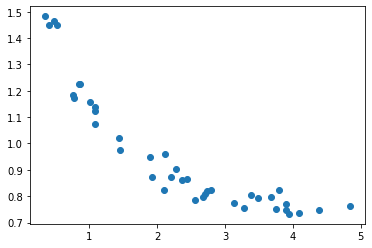

In [16]:
SAMPLES = 40
A,B = 0.0,5.0
x = np.random.uniform(low=A,high=B,size=SAMPLES)
y = 2**(x*-1.1) + 0.7\
    + np.random.normal(scale = 0.05, size=SAMPLES)
plt.plot(x,y,"o");

[-1.27902646  0.73458113]


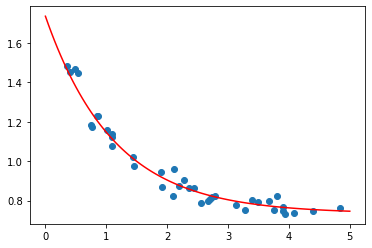

In [17]:
def error(c):
    return 2**(x*c[0]) + c[1] - y

solution = least_squares(error,[0,0]).x
print(solution)

reg_x = np.linspace(A,B,100)
reg_y = 2**(reg_x*solution[0]) + solution[1]
plt.plot(x,y,"o",reg_x,reg_y,"r-");

Imagine a case where you have these measurements:
![](instruments.png)
This can be modeled as the sum of a couple of gaussians and a chi-squared distribution
$$f1 = k1 * \frac{e^{-(x-m1)^2}}{2*s1^2}$$
$$f2 = k2 * \frac{e^{-(x-m2)^2}}{2*s2^2}$$
$$f3 = k3 * chi2.dist(x,m3,s3)$$

```Python
def error(c):
  x,y = instrument_data
  k1 = c[0]
  m1 = c[1]
  s1 = c[2]
  k2 = c[3]
  m2 = c[4]
  s2 = c[5]
  k3 = c[6]
  m3 = c[7]
  s3 = c[8]
    
  f1 = gaussian(k1, m2, s1, x)
  f2 = gaussian(k2, m2, s2, x)
  f3 = chisquare(k3, m3, s3, x)
  err = y - (f1+f2+f3)
  return err
```